I realized this is a bias dataset. Most probably supervised models were underfit.  In situations like this, none of the regression models will have a good fit for the dataset due to the large predence of the 0s. Thus, I try to break the problem, into a two-step machine learning model. 

First step is to classify the data points as positive revenue and zero revenue. This simply is a binary classification.
Next, I build a regression model to postprocess classification results. Here is a flow chart to show how I the outline of the model. 

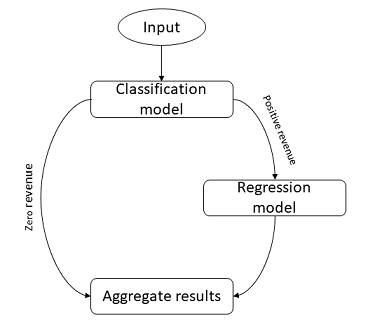

## 1.DATA PREPARATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import ast
from pandas.io.json import json_normalize #package for flattening json in pandas df

In [2]:
df = pd.read_csv('data.csv')
x = str([{'index': 'xxx','value': 'unknown'}])
for i in df['customDimensions']:
    if ast.literal_eval(i) == []:
        df['customDimensions'].replace(i,x,inplace = True)

In [3]:
df['customDimensions'] = df['customDimensions'].apply(lambda x: ast.literal_eval(x))
df['customDimensions']= df['customDimensions'].apply(lambda x: x[0])
df['customDimensions'] = df['customDimensions'].apply(lambda x: str(x))

In [4]:
cust_Dim = json_normalize(df['customDimensions'].apply(eval))
cust_Dim.replace('xxx',np.nan,inplace = True)

In [5]:
value = pd.get_dummies(cust_Dim['value'],columns = 'values', prefix = 'value')

In [6]:
x = str([{'hitNumber':'xxx', 'time':'xxx', 'hour':'xxx', 'minute':'xxx', 'isInteraction':'xxx', 'isEntrance':'xxx', 'isExit':'xxx', 'referer':'xxx', 'page':'xxx', 'transaction':'xxx', 'item':'xxx',
          'appInfo':'xxx','exceptionInfo':'xxx','product':'xxx','promotion':'xxx','eCommerceAction':'xxx', 'experiment':'xxx', 'customVariables':'xxx', 'customDimensions':'xxx',
          'customMetrics':'xxx', 'type':'xxx','social':'xxx','contentGroup':'xxx','dataSource':'xxx','publisher_infos':'xxx'}])

In [7]:
for i in df['hits']:
    if ast.literal_eval(i) == []:
        df['hits'].replace(i,x,inplace = True)

In [8]:
df['hits'] = df['hits'].apply(lambda x: ast.literal_eval(x))
df['hits']= df['hits'].apply(lambda x: x[0])
df['hits'] = df['hits'].apply(lambda x: str(x))

In [9]:
hits = json_normalize(df['hits'].apply(eval))
hits.replace('xxx',np.nan,inplace = True)

In [10]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 64 columns):
appInfo                                  0 non-null float64
appInfo.exitScreenName                   19994 non-null object
appInfo.landingScreenName                19994 non-null object
appInfo.screenDepth                      19994 non-null object
appInfo.screenName                       19994 non-null object
contentGroup                             0 non-null float64
contentGroup.contentGroup1               19994 non-null object
contentGroup.contentGroup2               19994 non-null object
contentGroup.contentGroup3               19994 non-null object
contentGroup.contentGroup4               19994 non-null object
contentGroup.contentGroup5               19994 non-null object
contentGroup.contentGroupUniqueViews1    80 non-null object
contentGroup.contentGroupUniqueViews2    7069 non-null object
contentGroup.contentGroupUniqueViews3    561 non-null object
contentGroup.previous

In [11]:
hits['hitNumber'] = hits['hitNumber'].apply(lambda x: x if pd.isnull(x) else int(x))

In [12]:
hits['hitNumber'].fillna(0, inplace=True)

In [13]:
geo_Network = json_normalize(df['geoNetwork'].apply(eval))

In [14]:
geo_Network.continent.unique()

array(['Europe', 'Americas', 'Asia', 'Oceania', '(not set)', 'Africa'],
      dtype=object)

In [15]:
continent = pd.get_dummies(geo_Network['continent'],columns = 'continents', prefix = 'continent')

In [16]:
device = json_normalize(df['device'].apply(eval))

In [17]:
deviceCategory = pd.get_dummies(device['deviceCategory'],columns = 'deviceCategory', prefix = 'deviceCategory')

In [18]:
isMobile =  pd.get_dummies(device['isMobile'],columns = 'isMobile', prefix = 'isMobile')

In [19]:
trafficSource = json_normalize(df['trafficSource'].apply(eval))

In [20]:
medium = pd.get_dummies(trafficSource['medium'],columns = 'medium', prefix = 'medium')

In [21]:
df.drop(['customDimensions', 'device', 'geoNetwork', 'hits', 'trafficSource'],axis=1,inplace=True)

In [22]:
df = pd.concat([df,value,hits['hitNumber'],continent,deviceCategory,medium,isMobile],axis=1)

In [23]:
df['totals_transactionRevenue'].fillna(0, inplace=True)
df['totals_totalTransactionRevenue'].fillna(0, inplace=True)
df['totals_transactions'].fillna(0, inplace=True)
df['totals_bounces'].fillna(0, inplace=True)
df['totals_newVisits'].fillna(0, inplace=True)
df['totals_pageviews'].fillna(0, inplace=True)
df['totals_sessionQualityDim'].fillna(0, inplace=True)
df['totals_timeOnSite'].fillna(0, inplace=True)

In [24]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,totals_bounces,totals_hits,totals_newVisits,...,deviceCategory_mobile,deviceCategory_tablet,medium_(none),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral,isMobile_False,isMobile_True
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,1.0,1,1.0,...,0,0,0,0,0,0,1,0,1,0
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,0.0,2,0.0,...,0,0,0,0,0,0,0,1,1,0
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,0.0,2,1.0,...,1,0,1,0,0,0,0,0,0,1
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,0.0,2,1.0,...,0,0,0,0,0,0,1,0,1,0
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,0.0,2,1.0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
channelGrouping = pd.get_dummies(df['channelGrouping'],columns = 'channelGrouping', prefix = 'channelGrouping')
df.drop(['channelGrouping'],axis=1,inplace=True)
df = pd.concat([df,channelGrouping],axis=1)

## 2. PREPARE FEATURE SET AND TARGET SET FOR CLASSIFICATION

In [26]:
df['Revenue_check'] = df['totals_transactionRevenue'].apply(lambda x: int(x >0))

In [27]:
X = df[['visitNumber','totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim','totals_timeOnSite','totals_transactions', 'totals_visits',
        'value_APAC', 'value_Central America', 'value_EMEA','value_North America', 'value_South America', 'value_unknown',
        'hitNumber',
        'continent_(not set)', 'continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe','continent_Oceania', 
        'deviceCategory_desktop', 'deviceCategory_mobile','deviceCategory_tablet',
        'medium_(none)', 'medium_affiliate','medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'channelGrouping_Affiliates', 'channelGrouping_Direct', 'channelGrouping_Display', 'channelGrouping_Organic Search', 
        'channelGrouping_Paid Search', 'channelGrouping_Referral','channelGrouping_Social', 'isMobile_True','isMobile_False']]

In [28]:
X.shape

(20000, 40)

In [29]:
y_clf = df['Revenue_check']

In [30]:
from sklearn.model_selection import train_test_split
X_train_org,X_test_org,y_clf_train,y_clf_test = train_test_split(X,y_clf,test_size=.25,random_state=10)

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train_org)
X_test = scaler1.transform(X_test_org)

## RANDOM FORREST

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier

In [33]:
forest = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=25, n_jobs=-1, random_state=0)
forest.fit(X_train, y_clf_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_clf_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_clf_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [34]:
from sklearn.metrics import roc_auc_score
y_clf_pred_train = forest.predict(X_train)
y_clf_pred_test = forest.predict(X_test)

print('Train roc_auc_score: %.2f'%roc_auc_score(y_clf_pred_train, y_clf_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_clf_pred_test, y_clf_test))

Train roc_auc_score: 1.00
Test roc_auc_score: 1.00 


In [35]:
X_tf = scaler1.transform(X)

In [36]:
y_clf_predict = forest.predict(X_tf)

In [37]:
y_clf.mean()

0.00965

In [38]:
y_clf_predict.mean()

0.0096

In [39]:
X.shape

(20000, 40)

In [40]:
df_new = X.copy()

In [41]:
df_new['Revenue'] = df['totals_transactionRevenue']
df_new['Revenue_check'] = y_clf

In [42]:
df_new['Predicted_Revenue_check'] = forest.predict(scaler1.transform(df_new.iloc[:,:40]))

In [43]:
# df_check = df_new[['Revenue_check','Predicted_Revenue_check']]

In [44]:
# df_check['check'] =  df_new['Revenue_check'] - df_new['Predicted_Revenue_check']

In [45]:
# df_check['check'].mean()*20000

In [46]:
df_new.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_visits,value_APAC,...,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isMobile_True,isMobile_False,Revenue,Revenue_check,Predicted_Revenue_check
0,1,1.0,1,1.0,1.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,1,0.0,0,0
1,6,0.0,2,0.0,2.0,2.0,28.0,0.0,1,0,...,0,0,0,1,0,0,1,0.0,0,0
2,1,0.0,2,1.0,2.0,1.0,38.0,0.0,1,0,...,0,0,0,0,0,1,0,0.0,0,0
3,1,0.0,2,1.0,2.0,1.0,1.0,0.0,1,0,...,0,1,0,0,0,0,1,0.0,0,0
4,1,0.0,2,1.0,2.0,1.0,52.0,0.0,1,0,...,0,1,0,0,0,0,1,0.0,0,0


## REGRESSION

The data used to train regression model will be instances with Revenue_check =1

In [47]:
df_regression = df_new[df_new['Revenue_check']>0]

In [48]:
df_regression.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_visits,value_APAC,...,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isMobile_True,isMobile_False,Revenue,Revenue_check,Predicted_Revenue_check
433,4,0.0,9,0.0,9.0,13.0,261.0,1.0,1,0,...,0,1,0,0,0,0,1,15190000.0,1,1
550,11,0.0,15,0.0,12.0,38.0,285.0,1.0,1,0,...,0,0,0,1,0,0,1,8000000.0,1,1
555,6,0.0,15,0.0,15.0,42.0,1044.0,1.0,1,0,...,0,1,0,0,0,1,0,57300000.0,1,1
597,17,0.0,18,0.0,16.0,77.0,514.0,1.0,1,0,...,0,0,0,1,0,0,1,18230000.0,1,1
619,1,0.0,21,1.0,20.0,62.0,487.0,1.0,1,0,...,0,0,0,1,0,0,1,12310000.0,1,1


In [49]:
df_regression.shape

(193, 43)

In [50]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [51]:
X_reg = df_regression[['visitNumber','totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim','totals_timeOnSite','totals_transactions', 'totals_visits',
        'value_APAC', 'value_Central America', 'value_EMEA','value_North America', 'value_South America', 'value_unknown',
        'hitNumber',
        'continent_(not set)', 'continent_Africa','continent_Americas', 'continent_Asia', 'continent_Europe','continent_Oceania', 
        'deviceCategory_desktop', 'deviceCategory_mobile','deviceCategory_tablet',
        'medium_(none)', 'medium_affiliate','medium_cpc', 'medium_cpm', 'medium_organic', 'medium_referral',
       'channelGrouping_Affiliates', 'channelGrouping_Direct', 'channelGrouping_Display', 'channelGrouping_Organic Search', 
        'channelGrouping_Paid Search', 'channelGrouping_Referral','channelGrouping_Social', 'isMobile_True','isMobile_False']]

In [52]:
y_reg = df_regression['Revenue']

In [53]:
X_reg_train_org,X_reg_test_org,y_reg_train,y_reg_test = train_test_split(X_reg,y_reg,test_size=.25,random_state=10)
scaler2 = StandardScaler()
X_reg_train = scaler2.fit_transform(X_reg_train_org)
X_reg_test = scaler2.transform(X_reg_test_org)

I will check the three models above to see which model is best for regression task: Gradient Boost, Linear Regression, Linear Ridge.

#### GRADIENT BOOST

In [54]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=200, learning_rate=0.1, random_state=0)
gbrt.fit(X_reg_train, y_reg_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [55]:
y_reg_train_pred = gbrt.predict(X_reg_train)
y_reg_test_pred =  gbrt.predict(X_reg_test)

In [56]:
from sklearn.metrics import r2_score
print('Train score: {:.4f}'.format(r2_score(y_reg_train, y_reg_train_pred)))
print('Test score: {:.4f}'.format(r2_score(y_reg_test, y_reg_test_pred)))

Train score: 0.9881
Test score: 0.3397


#### LINEAR REGRESSION

In [57]:
from sklearn.model_selection import cross_validate
model_score = cross_validate(LinearRegression(), X_reg_train, y_reg_train, cv = 5, return_train_score=True)
print('Average train score: %.6f'%model_score['train_score'].mean())
print('Average test score: %.6f'%model_score['test_score'].mean())

Average train score: 0.241122
Average test score: -0.513823


In [58]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_reg_train, y_reg_train)
print(lreg.score(X_reg_train, y_reg_train))
print(lreg.score(X_reg_test, y_reg_test))


0.21041086966782807
0.21645838564441533


#### RIDGE LINEAR REGRESSION

In [59]:
param_grid = {'alpha': [0.001,0.01,0.1,1,10,100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}


In [60]:
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
grid_Ridge = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)

In [61]:
grid_Ridge.fit(X_reg_train, y_reg_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [62]:
print("Best parameters: {}".format(grid_Ridge.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_Ridge.best_score_))

Best parameters: {'alpha': 100}
Best cross-validation score: -0.1015


In [63]:
print(grid_Ridge.score(X_reg_train, y_reg_train))
print(grid_Ridge.score(X_reg_test, y_reg_test))

0.16206199237569452
0.1658983586611381


Based on the score, I will use gradiant boost regressor to predict the revenue since it has highest tran score and test score on the dataset

## 3. AGGREGATING RESULT

In this part, I will present the whole process to predict totals_transactionRevenue if a data set with the fearure values and the totals_transactionRevenue is given. I will follow these steps to get the predicted totals_transactionRevenue:

I will use the whole dataset as a new data

In [64]:
data = X
data['Revenue'] = df['totals_transactionRevenue']

c:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


We will use the Random Forrest model to predict if each instance in the data has revenue or not

In [65]:
data['Predicted_Revenue_check'] = forest.predict(scaler1.transform(data.iloc[:,:40])) #scale original X with MinMaxScaler and predict Revenue_check

c:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Based on the result of Predicted_Revenue_check, we can split the data into 2 parts and predict the Revenue:

In [66]:
data.shape

(20000, 42)

In [67]:
data.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_visits,value_APAC,...,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isMobile_True,isMobile_False,Revenue,Predicted_Revenue_check
0,1,1.0,1,1.0,1.0,1.0,0.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0.0,0
1,6,0.0,2,0.0,2.0,2.0,28.0,0.0,1,0,...,0,0,0,0,1,0,0,1,0.0,0
2,1,0.0,2,1.0,2.0,1.0,38.0,0.0,1,0,...,1,0,0,0,0,0,1,0,0.0,0
3,1,0.0,2,1.0,2.0,1.0,1.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0.0,0
4,1,0.0,2,1.0,2.0,1.0,52.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0.0,0


In [68]:
data_rev0 = data[data['Predicted_Revenue_check']==0]

In [69]:
data_rev1 = data[data['Predicted_Revenue_check']==1]

data_rev0 contains isntances with Predicted_Revenue_check = 0 and data_rev1 contains isntances with Predicted_Revenue_check = 1

In [70]:
data_rev0.shape

(19808, 42)

In [71]:
data_rev1.shape

(192, 42)

Predicted_Revenue for data_rev0 is set to 0

In [72]:
data_rev0['Predicted_Revenue'] = 0

c:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
data_rev0.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_visits,value_APAC,...,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isMobile_True,isMobile_False,Revenue,Predicted_Revenue_check,Predicted_Revenue
0,1,1.0,1,1.0,1.0,1.0,0.0,0.0,1,0,...,0,1,0,0,0,0,1,0.0,0,0
1,6,0.0,2,0.0,2.0,2.0,28.0,0.0,1,0,...,0,0,0,1,0,0,1,0.0,0,0
2,1,0.0,2,1.0,2.0,1.0,38.0,0.0,1,0,...,0,0,0,0,0,1,0,0.0,0,0
3,1,0.0,2,1.0,2.0,1.0,1.0,0.0,1,0,...,0,1,0,0,0,0,1,0.0,0,0
4,1,0.0,2,1.0,2.0,1.0,52.0,0.0,1,0,...,0,1,0,0,0,0,1,0.0,0,0


Gradient Boost model will be used to fill Predicted_Revenue for data_rev1

In [74]:
data_rev1['Predicted_Revenue'] = gbrt.predict(scaler2.transform(data_rev1.iloc[:,:40]))#scale original X with StandarScaler and predict Revenue

c:\program files\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [75]:
data_rev1.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_visits,value_APAC,...,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isMobile_True,isMobile_False,Revenue,Predicted_Revenue_check,Predicted_Revenue
433,4,0.0,9,0.0,9.0,13.0,261.0,1.0,1,0,...,0,1,0,0,0,0,1,15190000.0,1,3.199917e+07
550,11,0.0,15,0.0,12.0,38.0,285.0,1.0,1,0,...,0,0,0,1,0,0,1,8000000.0,1,1.008405e+07
555,6,0.0,15,0.0,15.0,42.0,1044.0,1.0,1,0,...,0,1,0,0,0,1,0,57300000.0,1,-1.225388e+07
597,17,0.0,18,0.0,16.0,77.0,514.0,1.0,1,0,...,0,0,0,1,0,0,1,18230000.0,1,2.212215e+07
619,1,0.0,21,1.0,20.0,62.0,487.0,1.0,1,0,...,0,0,0,1,0,0,1,12310000.0,1,1.103631e+07


Last step is to store the result in Result table:

In [76]:
Result = pd.concat([data_rev1,data_rev0])

In [77]:
Result.shape

(20000, 43)

In [78]:
Result.head()

,visitNumber,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_visits,value_APAC,...,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,isMobile_True,isMobile_False,Revenue,Predicted_Revenue_check,Predicted_Revenue
433,4,0.0,9,0.0,9.0,13.0,261.0,1.0,1,0,...,0,1,0,0,0,0,1,15190000.0,1,3.199917e+07
550,11,0.0,15,0.0,12.0,38.0,285.0,1.0,1,0,...,0,0,0,1,0,0,1,8000000.0,1,1.008405e+07
555,6,0.0,15,0.0,15.0,42.0,1044.0,1.0,1,0,...,0,1,0,0,0,1,0,57300000.0,1,-1.225388e+07
597,17,0.0,18,0.0,16.0,77.0,514.0,1.0,1,0,...,0,0,0,1,0,0,1,18230000.0,1,2.212215e+07
619,1,0.0,21,1.0,20.0,62.0,487.0,1.0,1,0,...,0,0,0,1,0,0,1,12310000.0,1,1.103631e+07


In [79]:
from sklearn.metrics import r2_score

In [80]:
print('Model score: {:.4f}'.format(r2_score(Result['Revenue'],Result['Predicted_Revenue'])))

Model score: 0.8225


The R-squared obtained is significantly better compared to the result from the Term Projec (the highest score was 0.26)